In [1]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)
pd.set_option("display.max_rows", None)

In [2]:
base_dir="/Users/nfanlo/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2"
dir_src=os.path.join(base_dir, "best_model", "dev_predictions.tsv")

preds_df = pd.read_csv(dir_src, sep="\t")
preds_df.head()

,Unnamed: 0,text,labels,predicted_labels,loss,probabilities,label,predicted_label
0,0,eso ! en no escuchar el despertador ! y te dormís nervioso ...con miedo...y peor es cuando te acostumbraste a dormir tarde,2,2,0.057687,[0.00755524 0.04849902 0.94394577],N,N
1,1,"No Dennis, no puedes cometer los mismo errores, es hora de cambiar y cometer nuevos errores",1,1,0.346591,[0.11361845 0.7070943 0.17928721],NEU,NEU
2,2,"En Castalla (Alicante) muy oportunamente, a primeros de mes celebran sus fiestas de Moros i Cristians i todos están de fiesta!",0,0,0.432727,[0.6487373 0.31991646 0.03134622],P,P
3,3,"Me gusta tanto el modo nocturno de Twitter, que paso entrando a cada rato y ni se qué escribir... hasta ahorita",0,2,2.869508,[0.0567268 0.3971246 0.54614854],P,N
4,4,"ay noooo una vez más sin mí, todo el corazón roto",2,2,0.264169,[0.02774071 0.20441514 0.76784414],N,N


In [3]:
print(f"""
Total examples: {preds_df.count()[0]}
Correctly classified: {preds_df.query('label == predicted_label').count()[0]}
Misclassified: {preds_df.query('label != predicted_label').count()[0]}
""")


Total examples: 723
Correctly classified: 495
Misclassified: 228



In [4]:
preds_df.query('label != predicted_label').sort_values(by="loss", ascending=False).head(10)

,Unnamed: 0,text,labels,predicted_labels,loss,probabilities,label,predicted_label
487,487,"ñery siempre fuiste uno de los uno , solo que vos no tenias la confianza para darte cuenta",0,2,5.225007,[0.00538032 0.06508742 0.9295323 ],P,N
160,160,hoy es mi último día de vacaciones y lo más emocionante de mi día ha sido hacer el puzzle de sunggyu,2,0,4.749619,[0.9433843 0.04796081 0.00865499],N,P
410,410,"Super Junior es un escape a todas las cosas malas que pasan en mi vida, es por eso que al apoyarlos no lo veo como una obligación",0,2,4.493824,[0.01117782 0.0901962 0.89862597],P,N
138,138,"nah! Yo estoy lleno de tattos y me arranco pellejitos, aprendí como razcarme y la verdad no les ha pasado nada",0,2,4.352718,[0.01287178 0.09963892 0.88748926],P,N
520,520,De vdd tengo mucho sueño! Ya estoy viejito,2,0,3.870602,[0.8502922 0.12886195 0.02084582],N,P
412,412,"Si mañana no entra metales, voy a sentir muy mal a la profe hasta que diga que va a revisar suave y sí pasaría, la profe es toda cosi",0,2,3.809066,[0.02216888 0.14074908 0.837082 ],P,N
217,217,Caminar no sólo es bueno para la salud Sino tmb para el bolsillo,0,2,3.761585,[0.02324688 0.10375182 0.8730013 ],P,N
66,66,Tarde con mi peque #Broh,0,2,3.669242,[0.02549578 0.20815532 0.76634896],P,N
433,433,es un amor viste el nuevo ep ¿¿¿ solo he visto el preview del ep de mañana y matan a la amiga de haesoo a pesar,0,2,3.430283,[0.03237779 0.35403302 0.61358917],P,N
125,125,si para ti que le vaticina al club 2 o 3 años no son malas palabras vale,0,2,3.406216,[0.03316648 0.45947617 0.5073574 ],P,N


In [5]:
trainer_output_files = [
   "/Users/nfanlo/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/checkpoint-1300/trainer_state.json",
   "/Users/nfanlo/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/checkpoint-1400/trainer_state.json",
   "/Users/nfanlo/dev/data/spanishclassfier_exp/dccuchile-distilbert-base-spanish-uncased-finetuned-with-spanish-tweets-clf-cleaned-ds/ep_2-lr_5e-5-msl_72-bs_8-ds_config_80-10-10-nl_5-do_0.2/best_model/trainer_state.json"]

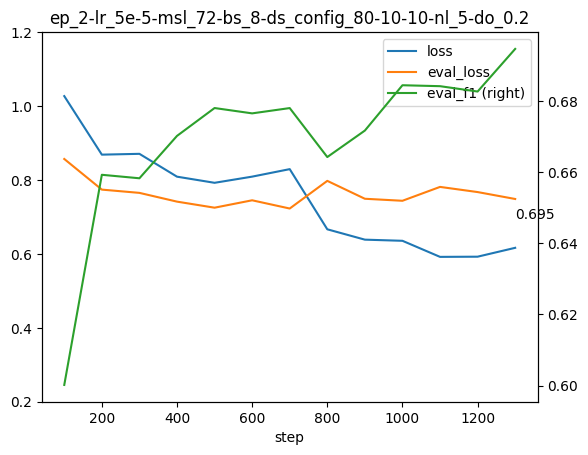

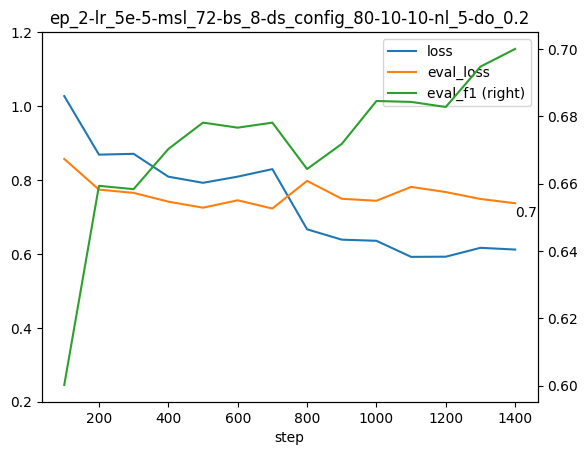

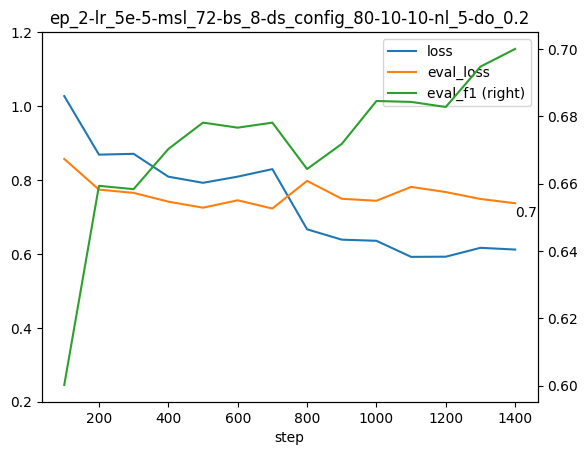

In [6]:
for tfile in trainer_output_files:
    with open(tfile) as f:
        trainer_json = json.load(f)
    log_hist = trainer_json['log_history']

    # Merge the two dicts that contain the losses per checkpoint in the log_history
    merged_hist = []
    for i in range(0, len(log_hist), 2):
        log_hist[i].update(log_hist[i+1])
        merged_hist.append(log_hist[i])

    df = pd.DataFrame.from_records(merged_hist)
    # Create an axes object    
    axes = plt.gca()
    # pass the axes object to plot function
    df.plot(title=tfile.split("/")[-3], kind='line', x='step', y=['loss', 'eval_loss'], ylim=(0.2,1.2), ax=axes)
    df.plot(title=tfile.split("/")[-3], kind='line', x='step', y='eval_f1', secondary_y = True, ax=axes)
    # Add the best F1 to the plot
    max_f1 = df['eval_f1'].max()
    index_f1 = df[df.eval_f1 == max_f1].index.values[0]
    step = int(df.iloc[index_f1]['step'])
    axes.annotate(f"{max_f1:.3}", xy=(step, max_f1))
    plt.show(block=True)
    
